In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
X_train = pd.read_csv('Data/Train_Test/X_train.csv').to_numpy()
y_train = pd.read_csv('Data/Train_Test/y_train.csv').to_numpy()
X_test = pd.read_csv('Data/Train_Test/X_test.csv').to_numpy()
y_test = pd.read_csv('Data/Train_Test/y_test.csv').to_numpy()

In [5]:
model = Sequential()

model.add(Dense(128,kernel_initializer='normal',input_dim = X_train.shape[1],activation = 'relu'))
model.add(Dense(256,kernel_initializer='normal',activation = 'relu'))
model.add(Dense(256,kernel_initializer='normal',activation = 'relu'))
model.add(Dense(256,kernel_initializer='normal',activation = 'relu'))
model.add(Dense(1,kernel_initializer='normal',activation = 'linear'))


In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 165,761
Trainable params: 165,761
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',loss = 'mean_absolute_error',metrics = ['mean_absolute_error'])

In [8]:
hist = model.fit(X_train,y_train,epochs=100,validation_split=0.33,batch_size=16)

Epoch 1/100
33/33 [==============================] - 0s 15ms/step - loss: 79.3968 - mean_absolute_error: 79.3968 - val_loss: 68.4889 - val_mean_absolute_error: 68.4889
Epoch 2/100
33/33 [==============================] - 0s 6ms/step - loss: 66.8839 - mean_absolute_error: 66.8839 - val_loss: 70.2339 - val_mean_absolute_error: 70.2339
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 67.1244 - mean_absolute_error: 67.1244 - val_loss: 63.8299 - val_mean_absolute_error: 63.8299
Epoch 4/100
33/33 [==============================] - 0s 6ms/step - loss: 63.7905 - mean_absolute_error: 63.7905 - val_loss: 64.2380 - val_mean_absolute_error: 64.2380
Epoch 5/100
33/33 [==============================] - 0s 7ms/step - loss: 61.4949 - mean_absolute_error: 61.4949 - val_loss: 63.6066 - val_mean_absolute_error: 63.6066
Epoch 6/100
33/33 [==============================] - 0s 7ms/step - loss: 61.5321 - mean_absolute_error: 61.5321 - val_loss: 62.9316 - val_mean_absolute_error: 62.93

Epoch 50/100
33/33 [==============================] - 0s 6ms/step - loss: 53.6232 - mean_absolute_error: 53.6232 - val_loss: 55.5007 - val_mean_absolute_error: 55.5007
Epoch 51/100
33/33 [==============================] - 0s 6ms/step - loss: 53.1530 - mean_absolute_error: 53.1530 - val_loss: 56.1184 - val_mean_absolute_error: 56.1184
Epoch 52/100
33/33 [==============================] - 0s 7ms/step - loss: 51.2474 - mean_absolute_error: 51.2474 - val_loss: 54.3347 - val_mean_absolute_error: 54.3347
Epoch 53/100
33/33 [==============================] - 0s 6ms/step - loss: 53.0193 - mean_absolute_error: 53.0193 - val_loss: 57.9953 - val_mean_absolute_error: 57.9953
Epoch 54/100
33/33 [==============================] - 0s 6ms/step - loss: 51.8844 - mean_absolute_error: 51.8844 - val_loss: 57.4383 - val_mean_absolute_error: 57.4383
Epoch 55/100
33/33 [==============================] - 0s 7ms/step - loss: 51.3572 - mean_absolute_error: 51.3572 - val_loss: 54.1510 - val_mean_absolute_error: 

Epoch 99/100
33/33 [==============================] - 0s 4ms/step - loss: 50.4820 - mean_absolute_error: 50.4820 - val_loss: 56.2508 - val_mean_absolute_error: 56.2508
Epoch 100/100
33/33 [==============================] - 0s 4ms/step - loss: 52.6304 - mean_absolute_error: 52.6304 - val_loss: 54.4813 - val_mean_absolute_error: 54.4813


In [9]:
pred = model.predict(X_test)

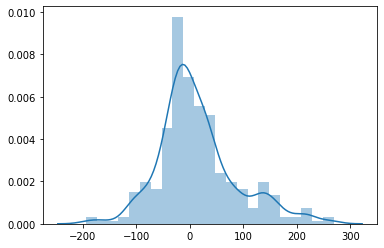

In [10]:
sns.distplot(y_test-pred)

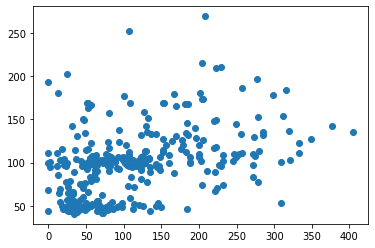

In [11]:
plt.scatter(y_test,pred)

In [12]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 53.938793614935896
MSE: 5657.825951206876
RMSE: 75.2185213308988
